In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from analysis_functions import make_sure_path_exists
from glam.plots import plot_correlation

/Users/felixmolter/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
make_sure_path_exists('results/descriptives')
make_sure_path_exists('results/figures')

In [3]:
np.random.seed(16) # from random.org

# Load prediction summaries

In [4]:
multiplicative_odd_summary = pd.read_csv(os.path.join('results', 'predictions', 'out_of_sample', 'descriptives',
                                                      'subject_summary_multiplicative_oos.csv'),
                                         index_col=[0], header=[0, 1])
multiplicative_odd_summary.head()

rt                                                   \
                mean          std    min      max         se       q1   
subject                                                                 
0        1434.192000   538.289384  419.0   4090.0  11.350659  1058.00   
1        1443.249796   759.370108  259.0   5570.0  15.344725   915.00   
2        4486.572000  2976.300751  539.0  33182.0  59.537924  2416.75   
3        1966.197273   505.283550  903.0   4722.0  10.775131  1648.00   
4        1650.926400   719.954680  514.0   5851.0  14.401974  1190.00   

                          best_chosen      gaze_influence             dataset  
              q3      iqr        mean Unnamed: 10_level_1 Unnamed: 11_level_1  
subject                                                                        
0        1681.00   623.00    0.904889            0.077317        krajbich2010  
1        1754.75   839.75    0.640000            0.216067        krajbich2010  
2        5643.50  3226.75    0.836000            0.007773        krajbich2010  
3        2185.00   537.00    0.656818            0.128273        krajbich2010  
4        1913.00   723.00    0.744800            0.387967        krajbich2010

In [5]:
import matplotlib.patches as mpatches

def figure_si_3(subject_summary, n_bins=20, figsize=(7.5, 3.5)):
    
    fig = plt.figure(figsize=figsize)

    ax00 = plt.subplot2grid((13, 3), (0, 0))
    ax10 = plt.subplot2grid((13, 3), (1, 0))
    ax20 = plt.subplot2grid((13, 3), (2, 0))
    ax30 = plt.subplot2grid((13, 3), (3, 0))
    ax40 = plt.subplot2grid((13, 3), (5, 0), rowspan=8)
    axs0 = np.array([ax00, ax10, ax20, ax30, ax40])

    ax01 = plt.subplot2grid((13, 3), (0, 1))
    ax11 = plt.subplot2grid((13, 3), (1, 1))
    ax21 = plt.subplot2grid((13, 3), (2, 1))
    ax31 = plt.subplot2grid((13, 3), (3, 1))
    ax41 = plt.subplot2grid((13, 3), (5, 1), rowspan=8)
    axs1 = np.array([ax01, ax11, ax21, ax31, ax41])

    ax02 = plt.subplot2grid((13, 3), (0, 2))
    ax12 = plt.subplot2grid((13, 3), (1, 2))
    ax22 = plt.subplot2grid((13, 3), (2, 2))
    ax32 = plt.subplot2grid((13, 3), (3, 2))
    ax42 = plt.subplot2grid((13, 3), (5, 2), rowspan=8)
    axs2 = np.array([ax02, ax12, ax22, ax32, ax42])

    datasets = ['krajbich2010', 'krajbich2011', 'folke2016', 'tavares2017']

    # Correlation plots
    for d, (dataset, marker, markercolor) in enumerate(zip(datasets,
                                                           ['+', '+', '+', '+'],
                                                           ['C0', 'C1', 'C2', 'C3'])):
        dataset_summary = subject_summary[subject_summary['dataset']['Unnamed: 11_level_1'] == dataset].reset_index(drop=True)
        plot_correlation(dataset_summary['rt']['mean'],
                         dataset_summary['best_chosen']['mean'],
                         marker=marker,
                         alpha=1.0,
                         markercolor=markercolor,
                         regression=False,
                         xlabel='Mean RT (ms)',
                         ylabel='P(choose best)',
                         xlim=(0, 8500),
                         xticks=np.arange(0, 9000, 2000),
                         ylim=(0.30, 1.0),
                         yticks=np.arange(0.4, 1.1, 0.2),
                         ax=ax40)

        plot_correlation(dataset_summary['gaze_influence'],
                         dataset_summary['rt']['mean'],
                         marker=marker,
                         alpha=1.0,
                         markercolor=markercolor,
                         regression=False,
                         ylabel='Mean RT (ms)',
                         xlabel='Gaze influence\non P(choice | value)',
                         ylim=(0, 8500),
                         yticks=np.arange(0, 9000, 2000),
                         xlim=(-0.25, 0.85),
                         xticks=np.arange(-0.2, 0.9, 0.2),
                         ax=ax41)

        plot_correlation(dataset_summary['best_chosen']['mean'],
                         dataset_summary['gaze_influence'],
                         marker=marker,
                         alpha=1.0,
                         markercolor=markercolor,
                         regression=False,
                             ylabel='Gaze influence\non P(choice | value)',
                         xlabel='P(choose best)',
                         ylim=(-0.25, 0.85),
                         yticks=np.arange(-0.2, 0.9, 0.2),
                         xlim=(0.35, 1),
                         xticks=np.arange(0.4, 1.1, 0.2),
                         ax=ax42)

        # Marginal histograms
        axs0[d].hist(dataset_summary['rt']['mean'],
                     bins=np.linspace(0, 8500, n_bins + 1),
                     color=markercolor)

        axs1[d].hist(dataset_summary['gaze_influence']['Unnamed: 10_level_1'],
                     bins=np.linspace(-0.2, 0.8, n_bins + 1),
                     color=markercolor)

        axs2[d].hist(dataset_summary['best_chosen']['mean'],
                     bins=np.linspace(0.3, 1, n_bins + 1),
                     color=markercolor)

        for axs in [axs0, axs1, axs2]:
            axs[d].set_xlim(axs[-1].get_xlim())

    patches = [mpatches.Rectangle((0, 0), 0.5, 1, fc="C{}".format(i))
               for i in range(len(datasets))]

    ax40.legend(patches,
                ['Krajbich 2010', 'Krajbich 2011', 'Folke 2016', 'Tavares 2017'],
                ncol=2,
                loc='lower left',
                handlelength=1, handleheight=1,
                fontsize=6, columnspacing=1,
                frameon=False)

    # Labels
    for label, ax in zip(list('abc'), [ax00, ax01, ax02]):
        ax.text(-0.3, 1.15, label, transform=ax.transAxes,
                fontsize=12, fontweight='bold', va='top')
    

    for ax in np.array([ax00, ax10, ax20, ax30,
                        ax01, ax11, ax21, ax31,
                        ax02, ax12, ax22, ax32]):
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_linewidth(0.5)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.subplots_adjust(wspace=0.5, hspace=0.3)
    
    return fig

# Make Figure SI 3

Close Figure to continue...


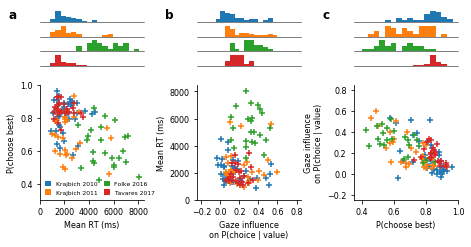

In [6]:
figure_si_3(subject_summary=multiplicative_odd_summary)
plt.savefig('results/figures/si_figure_3_predicted_individual_differences.png', dpi=330, bbox_inches='tight')
plt.show()